Needed Libs


In [20]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
# Suppress warnings for cleaner output
import warnings

DataSet

In [21]:
# Load dataset
df = pd.read_csv('D:\StudentPredictionML\Math-Students.csv')

# Inspect first 5 rows
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\SAUGAT\AppData\Local\Temp\ipykernel_2044\1775645357.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\StudentPredictionML\Math-Students.csv')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Seeing if Pass/Fail

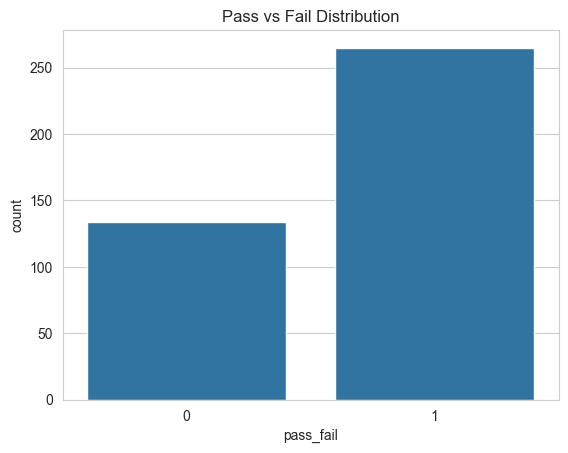

In [22]:
# Pass if G3 >= 10 else Fail
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)


df['pass_fail'].value_counts()

sns.countplot(x='pass_fail', data=df)
plt.title("Pass vs Fail Distribution")
plt.show()


Heatmap of pass/fail

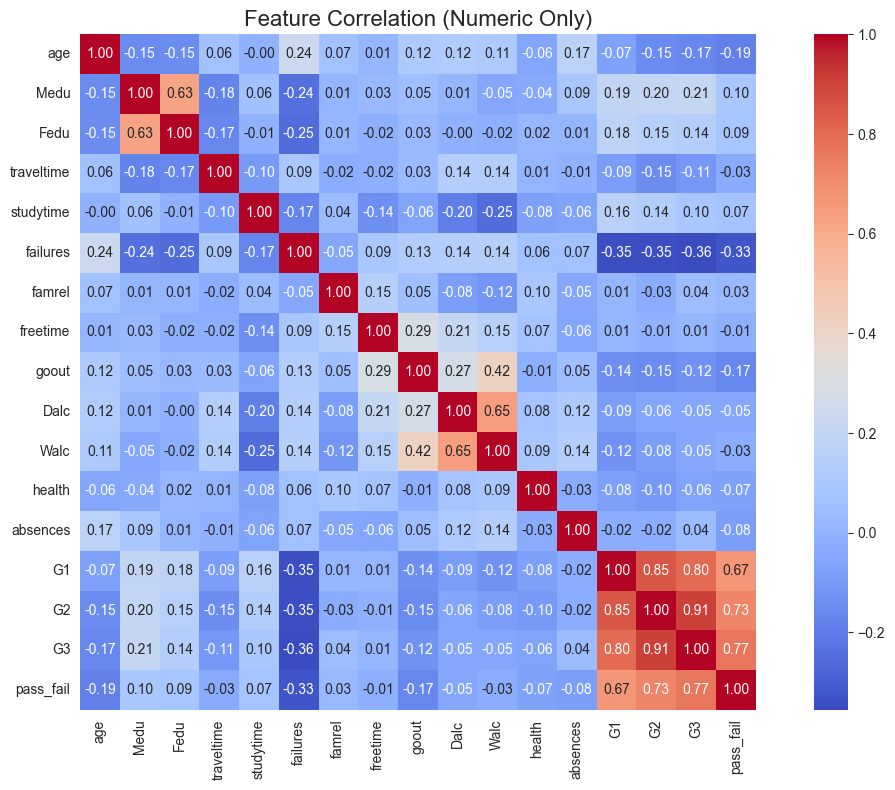

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation (Numeric Only)", fontsize=16)
plt.tight_layout()
plt.show()

Collec Columns

In [24]:
# categorical columns
cat_cols = df.select_dtypes(include='object').columns

# categ as numbers
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Scaliing Num.. Columns if needed

In [25]:
num_cols = ['age','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Testing target [ Grade(80 - 20 ) ]

In [26]:
X = df.drop(['pass_fail','G3'], axis=1)  # Drop target and final grade
y = df['pass_fail']

# Train(80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


StudyTime vs Pass/Fail

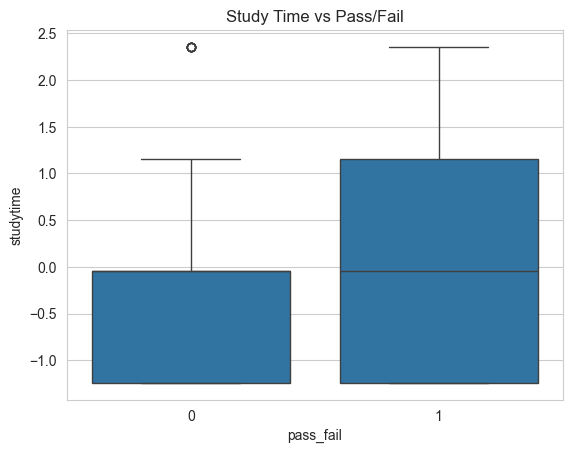

In [27]:
sns.boxplot(x='pass_fail', y='studytime', data=df)
plt.title("Study Time vs Pass/Fail")
plt.show()


Attendence vs Pass/Fail

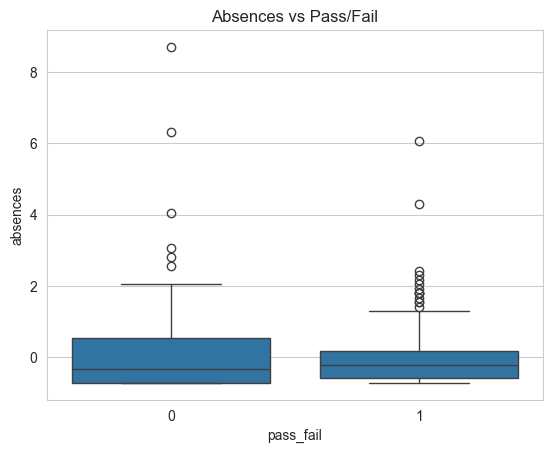

In [28]:
sns.boxplot(x='pass_fail', y='absences', data=df)
plt.title("Absences vs Pass/Fail")
plt.show()


Logistic Regression

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Decision Tree

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


Random Forest

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Models for Evaluation

In [32]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.9625
Precision: 0.9642857142857143
Recall: 0.9818181818181818
Confusion Matrix:
 [[23  2]
 [ 1 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.96      0.98      0.97        55

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



--- Decision Tree ---
Accuracy: 0.875
Precision: 0.8813559322033898
Recall: 0.9454545454545454
Confusion Matrix:
 [[18  7]
 [ 3 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.88      0.95      0.91        55

    accuracy                           0.88        80
   macro avg       0.87      0.83      0.85        80
weighted avg       0.87      0.88      0.87        80



--- Random Forest ---